In [1]:
from google.colab import drive

drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation , Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import glob
import matplotlib.pyplot as plt
from pandas import *


In [3]:
train_path = '/content/gdrive/MyDrive/Colab Notebooks/train'

In [4]:
classes1 = read_csv('/content/gdrive/MyDrive/Colab Notebooks/Book1.csv')['name'].tolist()

In [5]:
print(classes1)

['AJ_Cook', 'AJ_Lamas', 'Aaron_Eckhart', 'Aaron_Guiel', 'Aaron_Patterson', 'Aaron_Peirsol', 'Aaron_Pena', 'Aaron_Sorkin', 'Aaron_Tippin', 'Abba_Eban', 'Abbas_Kiarostami', 'Abdel_Aziz_Al-Hakim', 'Abdel_Madi_Shabneh', 'Abdel_Nasser_Assidi', 'Abdoulaye_Wade', 'Abdul_Majeed_Shobokshi', 'Abdul_Rahman', 'Abdulaziz_Kamilov', 'Abdullah', 'Abdullah_Ahmad_Badawi', 'Abdullah_Gul', 'Abdullah_Nasseef', 'Abdullah_al-Attiyah', 'Abdullatif_Sener', 'Abel_Aguilar', 'Abel_Pacheco', 'Abid_Hamid_Mahmud_Al-Tikriti', 'Abner_Martinez', 'Abraham_Foxman', 'Aby_Har-Even', 'Adam_Ant', 'Adam_Freier', 'Adam_Herbert', 'Adam_Kennedy', 'Adam_Mair', 'Adam_Rich', 'Adam_Sandler', 'Adam_Scott', 'Adel_Al-Jubeir', 'Adelina_Avila', 'Adisai_Bodharamik', 'Adolfo_Aguilar_Zinser', 'Adolfo_Rodriguez_Saa', 'Adoor_Gopalakarishnan', 'Adrian_Annus', 'Adrian_Fernandez', 'Adrian_McPherson', 'Adrian_Murrell', 'Adrian_Nastase', 'Adriana_Lima', 'Adriana_Perez_Navarro', 'Adrianna_Zuzic', 'Adrien_Brody', 'Afton_Smith', 'Agbani_Darego', 'Agn

In [6]:
train_batch = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(directory=train_path, target_size = (250,250), classes =classes1, batch_size= 10 )

Found 1059 images belonging to 432 classes.


In [7]:
imgs , labels = next(train_batch)

In [8]:
def plotImages(image_arr):
  fig, axes = plt.subplots(1,10,figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip (image_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()


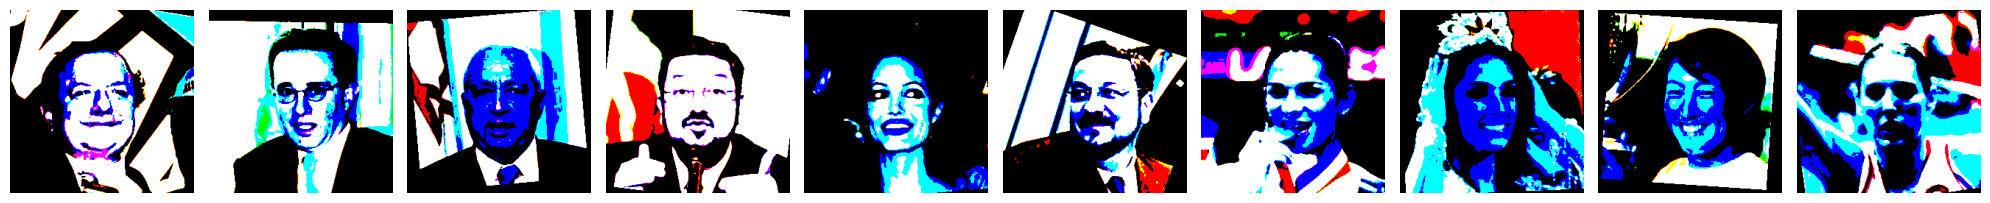

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
plotImages(imgs)
print(labels)

In [10]:
model = Sequential([
    Conv2D(filters= 32, kernel_size = (3,3), activation = 'relu', padding = 'same' , input_shape= (250,250,3)),
    MaxPool2D(pool_size = (2,2), strides= 2),
    Conv2D(filters= 64 , kernel_size= (3,3), activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size=(2,2), strides = 2),
    Flatten(),
    Dense(units = 432 , activation = 'softmax'),
    ])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 125, 125, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 246016)            0         
                                                                 
 dense (Dense)               (None, 432)               1

In [13]:
def am_softmax_loss(y_true, y_pred):
    scale = 30.0
    margin = 0.35

    y_pred = y_true * (y_pred - margin) + (1 - y_true) * y_pred
    y_pred *= scale
    return tf.keras.losses.categorical_crossentropy(y_true, y_pred, from_logits=True)

In [14]:
model.compile(optimizer= Adam(learning_rate= 0.01), loss= am_softmax_loss, metrics= ['accuracy'])

In [15]:
model.fit( x= train_batch, epochs = 10 , verbose= 2)

Epoch 1/10
106/106 - 303s - loss: 40.4293 - accuracy: 9.4429e-04 - 303s/epoch - 3s/step
Epoch 2/10
106/106 - 4s - loss: 40.4618 - accuracy: 9.4429e-04 - 4s/epoch - 37ms/step
Epoch 3/10
106/106 - 5s - loss: 40.4618 - accuracy: 9.4429e-04 - 5s/epoch - 47ms/step
Epoch 4/10
106/106 - 4s - loss: 40.4618 - accuracy: 9.4429e-04 - 4s/epoch - 41ms/step
Epoch 5/10
106/106 - 4s - loss: 40.4618 - accuracy: 9.4429e-04 - 4s/epoch - 38ms/step
Epoch 6/10
106/106 - 5s - loss: 40.4618 - accuracy: 9.4429e-04 - 5s/epoch - 50ms/step
Epoch 7/10
106/106 - 4s - loss: 40.4618 - accuracy: 9.4429e-04 - 4s/epoch - 38ms/step
Epoch 8/10
106/106 - 4s - loss: 40.4618 - accuracy: 9.4429e-04 - 4s/epoch - 39ms/step
Epoch 9/10
106/106 - 5s - loss: 40.4618 - accuracy: 9.4429e-04 - 5s/epoch - 51ms/step
Epoch 10/10
106/106 - 4s - loss: 40.4618 - accuracy: 9.4429e-04 - 4s/epoch - 39ms/step


In [16]:
test_path = '/content/gdrive/MyDrive/Colab Notebooks/test'

In [17]:
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(directory=test_path, target_size = (250,250), classes =classes1, batch_size= 10 )

Found 32 images belonging to 432 classes.


In [18]:
predictions= model.predict(x = test_batches , verbose=0)
np.round(predictions)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
cm = confusion_matrix(y_true = test_batches.classes, y_pred= np.argmax(predictions , axis=-1))

In [22]:
def plot_confusion_matrix(cm , classes, normalize = True, title = 'confusion Matrix',cmap= plt.cm.Blues):
  plt.imshow(cm , interpolation= 'nearest', cmap= cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks= np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm= cm.astype('float')/ cm.sum(axis =1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("confusion matrix , without normalisation")

  print(cm)

  thresh= cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, cm[i,j], horizontalalignment = "center", color = "white" if cm[i,j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel(' True label')
  plt.xlabel(' Predicted Label')





<ipython-input-22-91929e335112>:10: RuntimeWarning: invalid value encountered in divide
  cm= cm.astype('float')/ cm.sum(axis =1)[:, np.newaxis]


Normalized confusion matrix
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0

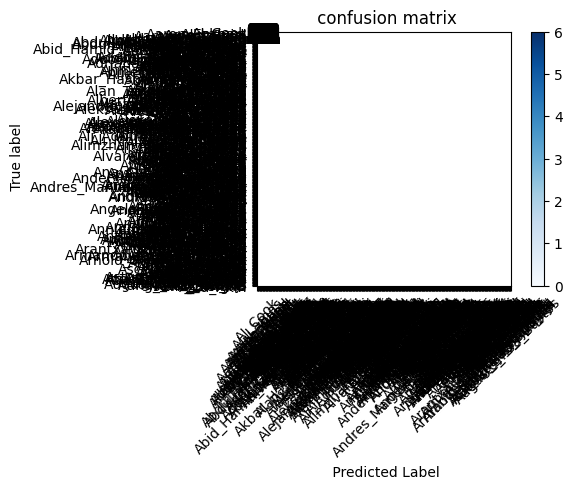

In [23]:
cm_plot_labels = classes1
plot_confusion_matrix(cm = cm, classes = cm_plot_labels , title = ' confusion matrix')